# Importing Required libraries

In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 999)

# Defining variables Required

In [8]:
base_path = r"C:\Projects\avst\advanced_python\proyecto_integrador"

# Defining Plot Functions

In [43]:
def plot_multivariate(df, var, title, discrete=False):
    df_seg1 = df[df['Cluster_Labels'] == 0]
    df_seg2 = df[df['Cluster_Labels'] == 1]
    df_seg3 = df[df['Cluster_Labels'] == 2]
    df_seg4 = df[df['Cluster_Labels'] == 3]
    
    plot_size = (14, 6)
    if df[var].dtype != 'O':
        fig, (ax_hist, ax_des) = plt.subplots(nrows=1, ncols=2, figsize=plot_size, sharex=True)
    else:
        fig, ax_hist = plt.subplots(nrows=1, ncols=1, figsize=plot_size, sharex=True)
    
    # Histograms
    sns.histplot(data=df_seg1, x=var, label="Mid-High", kde=False, ax=ax_hist, discrete=discrete)
    sns.histplot(data=df_seg2, x=var, label="Mid-Low", kde=False, ax=ax_hist, discrete=discrete)
    sns.histplot(data=df_seg3, x=var, label="Rich", kde=False, ax=ax_hist, discrete=discrete)
    sns.histplot(data=df_seg4, x=var, label="Poor", kde=False, ax=ax_hist, discrete=discrete)
    ax_hist.set_xlabel(title)
    ax_hist.set_ylabel('Frecuency')

    if df[var].dtype != 'O':
        # Density Curve
        sns.kdeplot(data=df_seg1, x=var, label="Mid-High", fill=True, ax=ax_des)
        sns.kdeplot(data=df_seg2,  x=var, label="Mid-Low", fill=True, ax=ax_des)
        sns.kdeplot(data=df_seg3,  x=var, label="Rich", fill=True, ax=ax_des)
        sns.kdeplot(data=df_seg4,  x=var, label="Poor", fill=True, ax=ax_des)
        ax_des.set_xlabel(title)
        ax_des.set_ylabel('Density')
        ax_des.legend()
    else:
        ax_hist.legend()

    plt.tight_layout()

# Reading dataset

In [9]:
df = pd.read_csv(os.path.join(base_path, 'marketing_campaign_classified.csv'))
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cluster_Labels
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,0
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,1
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,2
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,0


In [66]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Cluster_Labels'],
      dtype='object')

# Multivariate Analysis
## Income

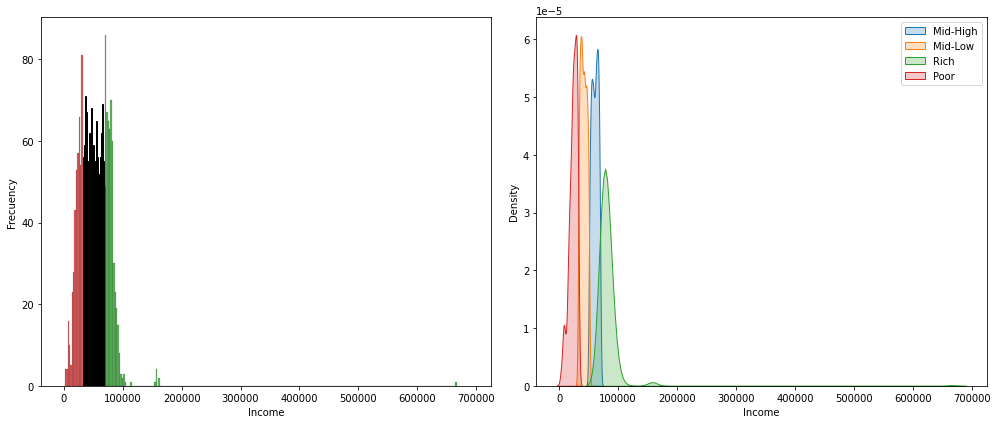

In [44]:
plot_multivariate(df, 'Income', 'Income')

### Removing Outlier

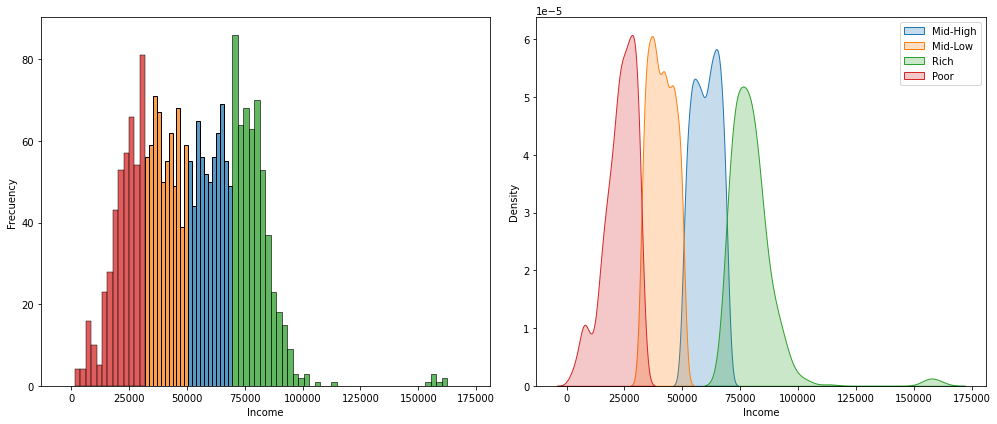

In [45]:
df_clean = df[df['Income'] < 600000]
plot_multivariate(df_clean, 'Income', 'Income')

## Education

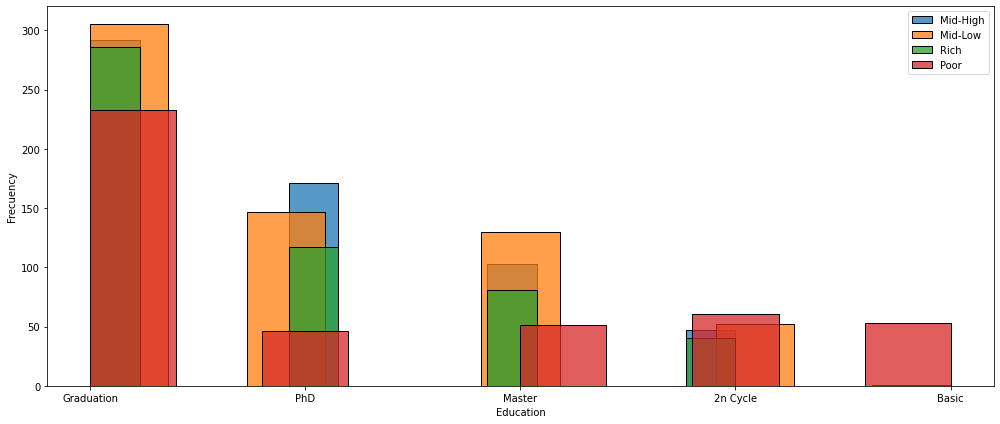

In [47]:
plot_multivariate(df, 'Education', 'Education')

## Kidhome

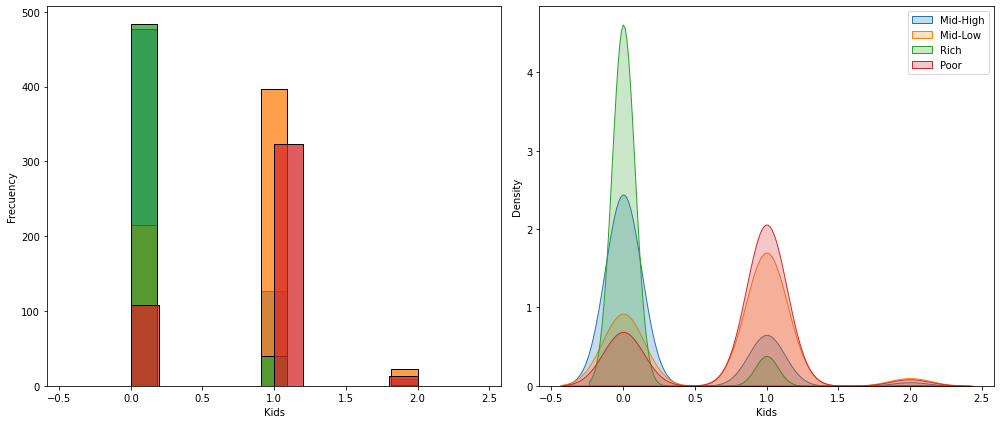

In [50]:
plot_multivariate(df, 'Kidhome', 'Kids', discrete=False)

# TeenHome

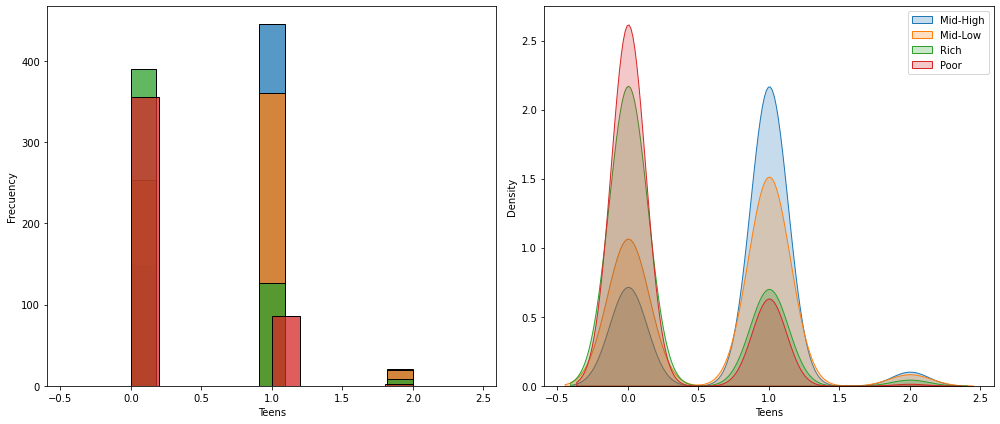

In [51]:
plot_multivariate(df, 'Teenhome', 'Teens', discrete=False)

## Age

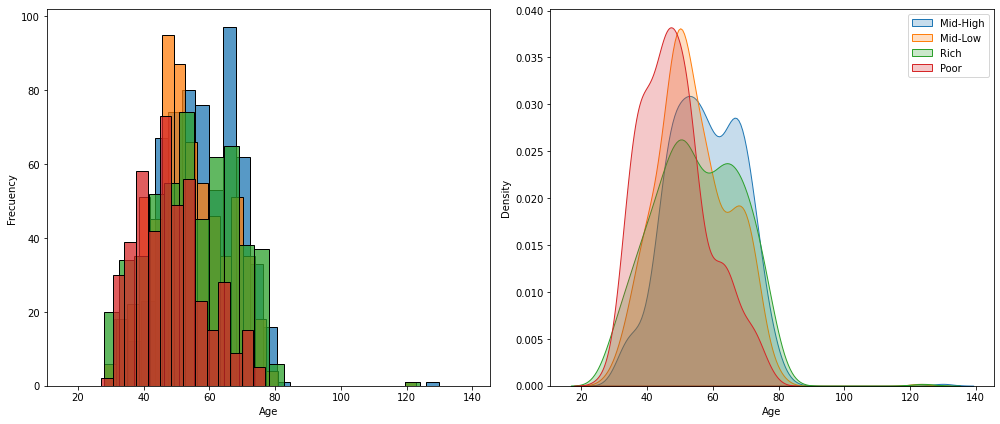

In [52]:
plot_multivariate(df, 'Age', 'Age')

### Removing Outliers

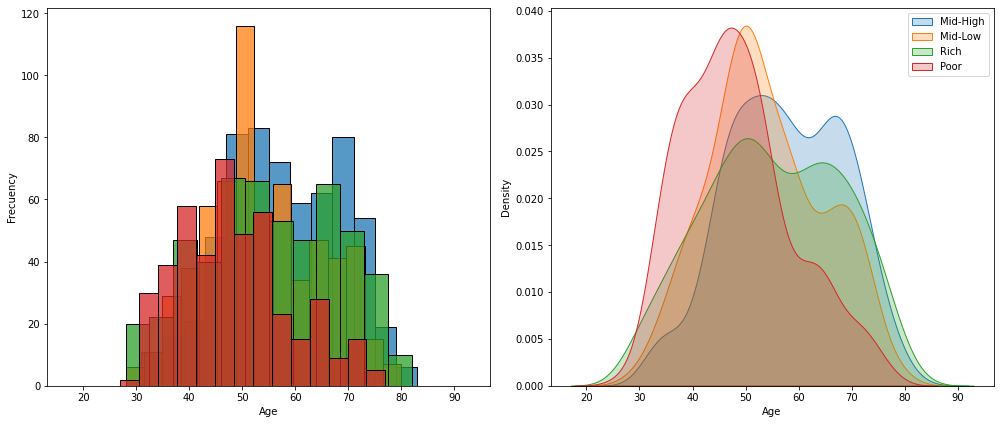

In [53]:
df_clean = df[df['Age'] < 100]
plot_multivariate(df_clean, 'Age', 'Age')

## Recency

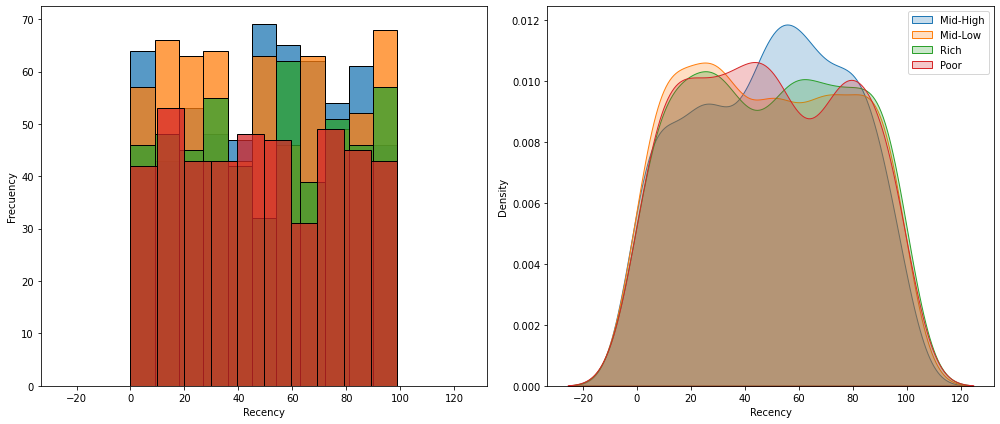

In [55]:
plot_multivariate(df_clean, 'Recency', 'Recency')

## Marital Status

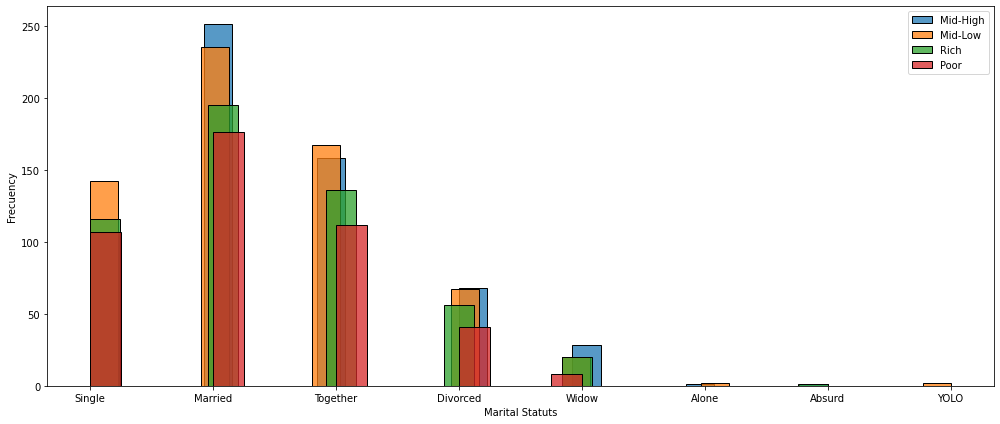

In [46]:
plot_multivariate(df, 'Marital_Status', 'Marital Statuts')

# Where they buy?
## Catalog

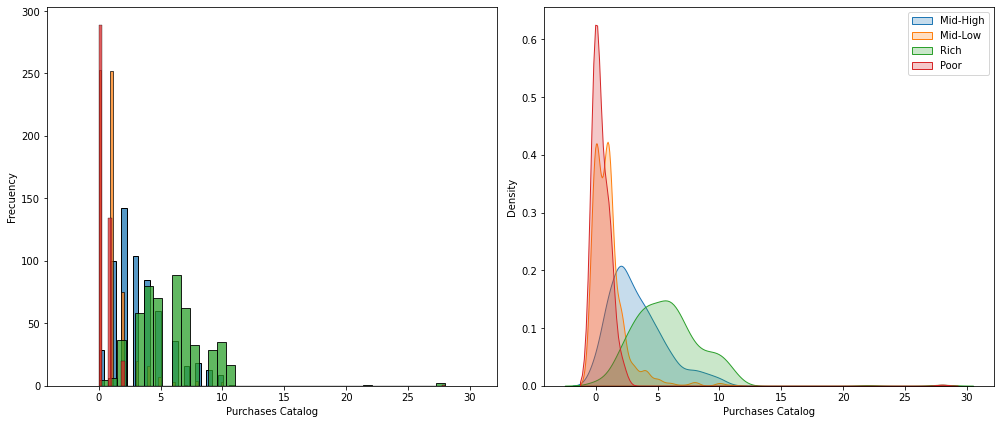

In [60]:
plot_multivariate(df, 'NumCatalogPurchases', 'Purchases Catalog')

### Removing Outliers

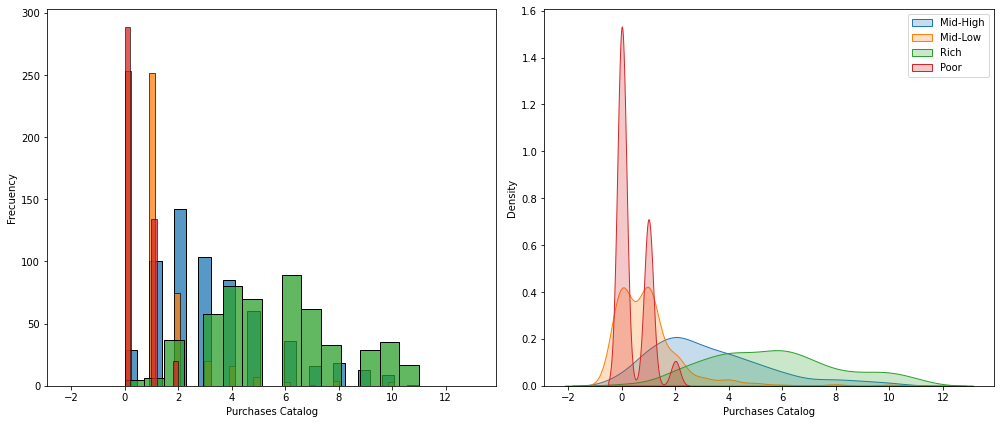

In [61]:
df_clean = df[df['NumCatalogPurchases'] < 20]
plot_multivariate(df_clean, 'NumCatalogPurchases', 'Purchases Catalog')

# Store

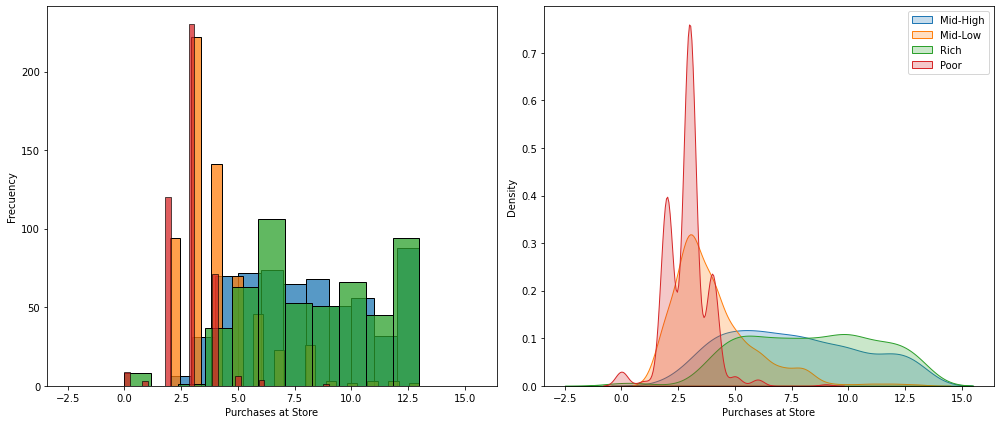

In [62]:
plot_multivariate(df, 'NumStorePurchases', 'Purchases at Store')

## Web

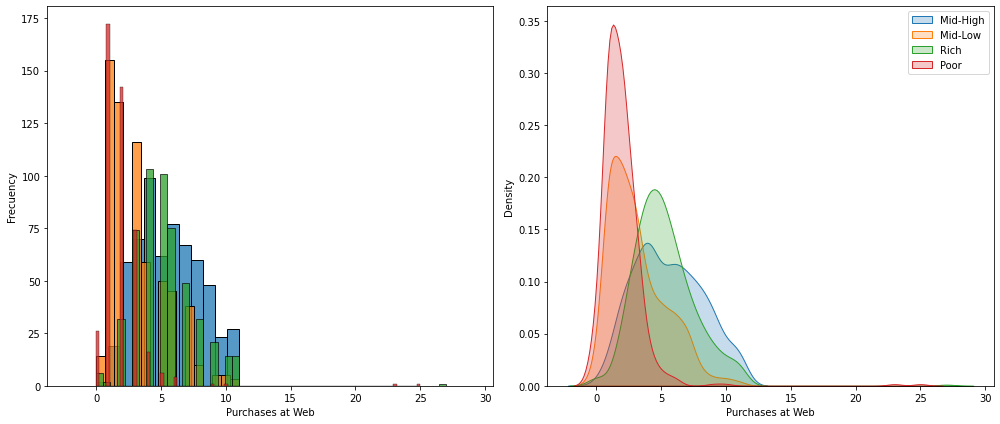

In [59]:
plot_multivariate(df, 'NumWebPurchases', 'Purchases at Web')

### How often visit the web?

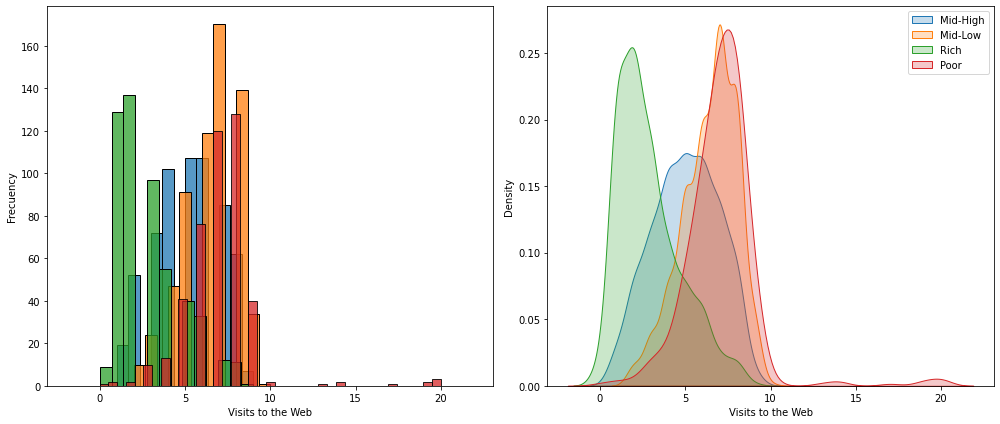

In [64]:
plot_multivariate(df, 'NumWebVisitsMonth', 'Visits to the Web')

# How much do they spent by type of product?

##  Wine

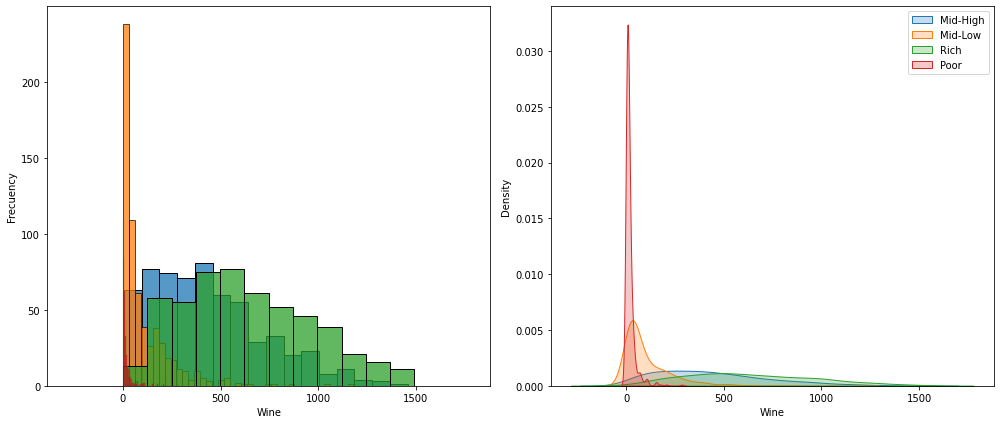

In [48]:
plot_multivariate(df, 'MntWines', 'Wine')

# Meat

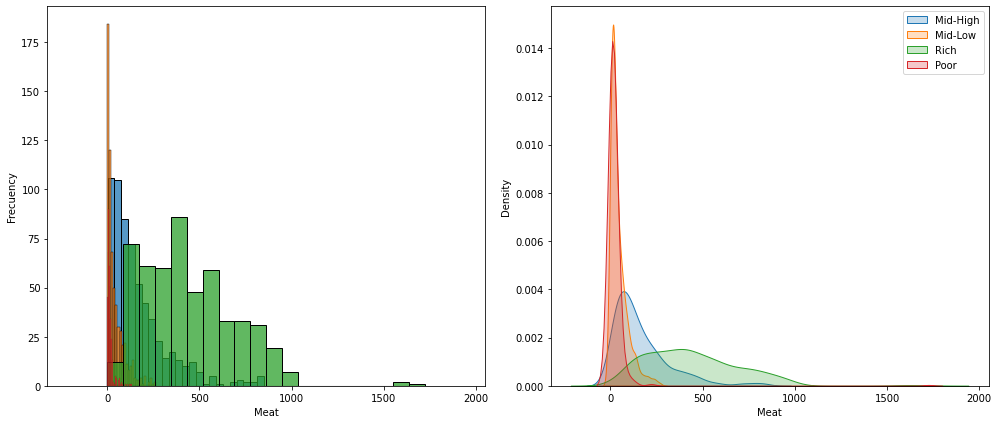

In [67]:
plot_multivariate(df, 'MntMeatProducts', 'Meat')

## Fish

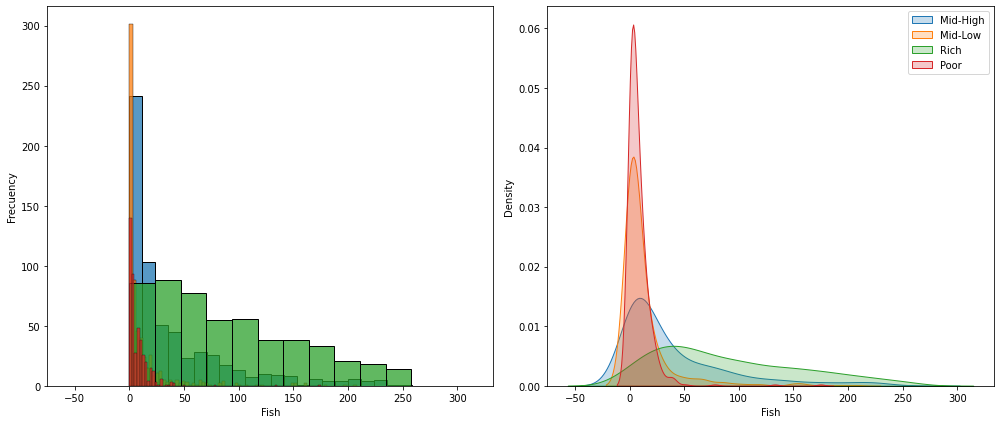

In [68]:
plot_multivariate(df, 'MntFishProducts', 'Fish')

# Gold

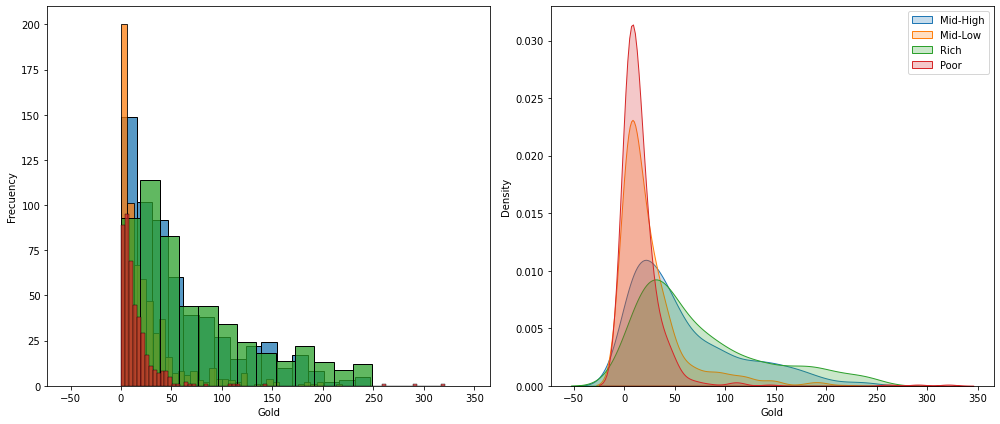

In [69]:
plot_multivariate(df, 'MntGoldProds', 'Gold')

# Sweet Products

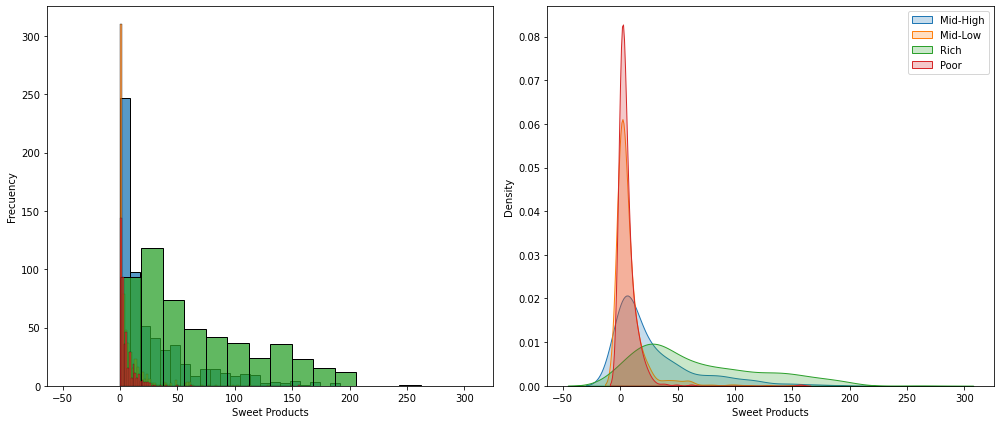

In [70]:
plot_multivariate(df, 'MntSweetProducts', 'Sweet Products')

# Deals

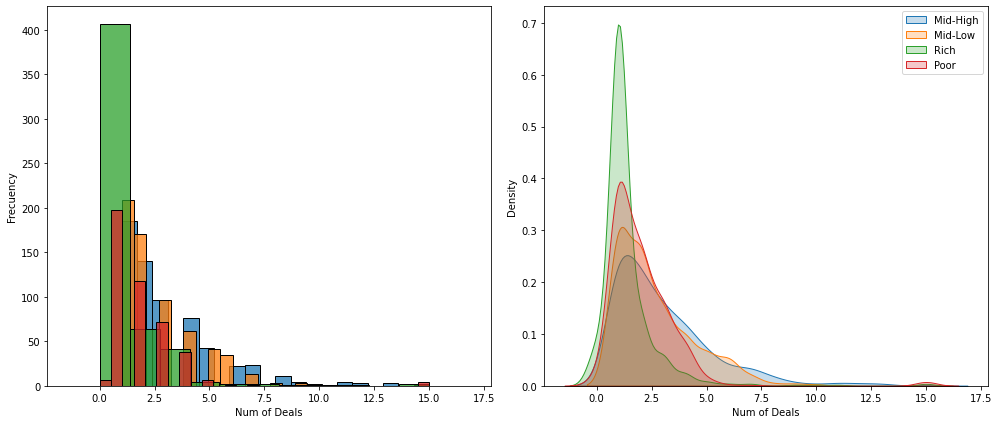

In [71]:
plot_multivariate(df, 'NumDealsPurchases', 'Num of Deals')